In [3]:
from scipy.spatial import distance
import pandas as pd
from sklearn.preprocessing import *
import numpy as np
import math
import matplotlib

filepath='stock_data_without_name.csv'
df = pd.read_csv(filepath, engine='python'  )

In [4]:
print(df.index)

RangeIndex(start=0, stop=2758, step=1)


In [5]:
df_index= ['A005930','A000660','A068270','A005380','A005490', 'A035420','A051910',
           'A105560','A012330','A055550','A015760','A051900','A032830','A017670','A034730',
           'A096770','A090430','A006400','A033780','A066570','A000270',
           'A003550','A010950','A086790','A000810','A011170','A009150','A000030']

In [6]:
data = df.transpose().drop(['Symbol'])

In [9]:
#기준이 되는 데이터 stock 1개 <-> 나머지 데이터 stock전부(27개)
print(df[df_index[2]])

0        31354
1        31354
2        33418
3        32681
4        32190
5        33123
6        33910
7        33910
8        33910
9        33910
10       33910
11       34155
12       34696
13       33959
14       33959
15       33959
16       33320
17       36613
18       35040
19       35679
20       35384
21       35384
22       35384
23       34205
24       34991
25       34008
26       34647
27       34401
28       34401
29       34401
         ...  
2728    297500
2729    290000
2730    290000
2731    290000
2732    299500
2733    292500
2734    299500
2735    300500
2736    301000
2737    301000
2738    301000
2739    303000
2740    307500
2741    301000
2742    292500
2743    283000
2744    283000
2745    283000
2746    289000
2747    286500
2748    281000
2749    277000
2750    285500
2751    285500
2752    285500
2753    289000
2754    295000
2755    297000
2756    292000
2757    288000
Name: A068270, Length: 2758, dtype: int64


In [11]:
y1 = normalize(data)

In [12]:
print(y1)

[[0.01138085 0.01138085 0.01153791 ... 0.02821048 0.02842191 0.02839171]
 [0.01033691 0.01033691 0.01063468 ... 0.03815723 0.038455   0.03815723]
 [0.0056535  0.0056535  0.00602567 ... 0.05355265 0.05265109 0.05192984]
 ...
 [0.01783206 0.01783206 0.01770214 ... 0.02182722 0.02208707 0.02195714]
 [0.02804981 0.02804981 0.02827602 ... 0.03562778 0.03494916 0.03472295]
 [0.0205687  0.0205687  0.0205687  ... 0.02217146 0.02190433 0.0220379 ]]


In [13]:
print(type(y1))

<class 'numpy.ndarray'>


In [14]:
data_list = ['삼성전자', 'SK하이닉스', '셀트리온', '현대차','POSCO',
                     'NAVER', 'LG화학', 'KB금융', '현대모비스', '신한지주',
                     '한국전력', 'LG생활건강', '삼성생명', 'SK텔레콤', 'SK',
                     'SK이노베이션', '아모레퍼시픽', '삼성SDI',	'KT&G',	'LG전자',
                      '기아차', 'LG', 'S-Oil', '하나금융지주', '삼성화재', '롯데케미칼',
                     '삼성전기', '우리은행']

# 정규화 된 NP 타입 데이터 가지고 거리함수 계산 

In [116]:
d1 = pd.DataFrame(y1, index = data_list ) 
d1_trans = d1.transpose()
d1_trans

,삼성전자,SK하이닉스,셀트리온,현대차,POSCO,NAVER,LG화학,KB금융,현대모비스,신한지주,...,KT&G,LG전자,기아차,LG,S-Oil,하나금융지주,삼성화재,롯데케미칼,삼성전기,우리은행
0,0.011381,0.010337,0.005654,0.017405,0.028657,0.010389,0.023472,0.025937,0.020183,0.022918,...,0.013364,0.028847,0.017735,0.023975,0.018383,0.021889,0.016037,0.017832,0.028050,0.020569
1,0.011381,0.010337,0.005654,0.017405,0.028657,0.010389,0.023472,0.025937,0.020183,0.022918,...,0.013364,0.028847,0.017735,0.023975,0.018383,0.021889,0.016037,0.017832,0.028050,0.020569
2,0.011538,0.010635,0.006026,0.017305,0.028657,0.010814,0.023592,0.026416,0.020009,0.022832,...,0.013282,0.029854,0.017735,0.024335,0.018807,0.022323,0.016479,0.017702,0.028276,0.020569
3,0.011550,0.010805,0.005893,0.017603,0.028451,0.010554,0.023412,0.026940,0.020496,0.023090,...,0.013467,0.030106,0.018394,0.024196,0.018787,0.022348,0.016405,0.018319,0.029181,0.020569
4,0.011538,0.010826,0.005804,0.017653,0.029540,0.010342,0.023712,0.027027,0.020287,0.022961,...,0.013426,0.029350,0.019227,0.023726,0.018282,0.022705,0.016442,0.018579,0.028955,0.020569
5,0.011381,0.011166,0.005972,0.019195,0.030070,0.010601,0.025272,0.026024,0.021297,0.022703,...,0.013241,0.029225,0.020025,0.023671,0.017817,0.022552,0.016111,0.019294,0.029520,0.020569
6,0.011055,0.011103,0.006114,0.019195,0.029658,0.010460,0.025002,0.025763,0.020879,0.022359,...,0.013385,0.028972,0.019921,0.024003,0.018201,0.022501,0.016111,0.019651,0.029520,0.020569
7,0.011055,0.011103,0.006114,0.019195,0.029658,0.010460,0.025002,0.025763,0.020879,0.022359,...,0.013385,0.028972,0.019921,0.024003,0.018201,0.022501,0.016111,0.019651,0.029520,0.020569
8,0.011055,0.011103,0.006114,0.019195,0.029658,0.010460,0.025002,0.025763,0.020879,0.022359,...,0.013385,0.028972,0.019921,0.024003,0.018201,0.022501,0.016111,0.019651,0.029520,0.020569
9,0.011091,0.011060,0.006114,0.019493,0.028893,0.010625,0.024642,0.025763,0.020740,0.022445,...,0.013262,0.028847,0.020268,0.024694,0.017999,0.022425,0.016185,0.019586,0.029859,0.020569


In [117]:
def euclidean_distance(st_data, comp_data): #dataframe 형태 1 x N 배열
    stock_len = len(st_data)
    dis = 0
    for i in range(stock_len):
        dis += (st_data[i] - comp_data[i])**2
    distance = math.sqrt(dis)
    return distance
    

In [118]:
euclidean_distance(d1.iloc[1], d1.iloc[2]) # 직접 구현한 함수

0.432709064569768

In [119]:
distance.euclidean(d1.iloc[1], d1.iloc[2])

0.43270906456976754

In [120]:
distance.chebyshev(d1.iloc[1], d1.iloc[2])

0.03672306937714382

In [121]:
def chebyshev_distance(st_data, comp_data):
    stock_len = len(st_data)
    dis = 0
    for i in range(stock_len):
        comp_dis = st_data[i] - comp_data[i]
        dis = max(abs(comp_dis), dis)
    return dis

In [122]:
distance.cityblock(d1.iloc[1], d1.iloc[2])

18.171309464547157

In [123]:
def manhattan(st_data, comp_data):
    stock_len = len(st_data)
    dis = 0
    for i in range(stock_len):
        dis += abs(st_data[i] - comp_data[i])
    return dis

In [124]:
manhattan(d1.iloc[1], d1.iloc[2])

18.17130946454718

In [125]:
chebyshev_distance(d1.iloc[1], d1.iloc[2])

0.03672306937714382

In [126]:
stand_data = d1.loc[data_list[0]]
stand_data_name = data_list[0]

In [127]:
print(len(stand_data))

2758


In [128]:
print(stand_data)

0       0.011381
1       0.011381
2       0.011538
3       0.011550
4       0.011538
5       0.011381
6       0.011055
7       0.011055
8       0.011055
9       0.011091
10      0.011079
11      0.011043
12      0.011465
13      0.011212
14      0.011212
15      0.011212
16      0.011417
17      0.011477
18      0.011828
19      0.011925
20      0.011792
21      0.011792
22      0.011792
23      0.011695
24      0.011743
25      0.011900
26      0.012021
27      0.012057
28      0.012057
29      0.012057
          ...   
2728    0.028935
2729    0.028392
2730    0.028392
2731    0.028392
2732    0.028422
2733    0.027727
2734    0.028664
2735    0.028301
2736    0.027939
2737    0.027939
2738    0.027939
2739    0.028090
2740    0.027637
2741    0.028210
2742    0.027848
2743    0.027486
2744    0.027486
2745    0.027486
2746    0.027486
2747    0.027908
2748    0.028029
2749    0.027727
2750    0.027667
2751    0.027667
2752    0.027667
2753    0.028271
2754    0.027878
2755    0.0282

In [129]:
for names in data_list:
    if stand_data_name != names:
        print(distance.euclidean(stand_data, d1.loc[names] ))

0.20036228667484343
0.49363212548700314
0.45711458003677663
0.4206503436795554
0.25150751671056865
0.3697455210398643
0.2537596186587899
0.3990838641089686
0.2995102130984334
0.37669021020826404
0.22728912512306088
0.26332926597040474
0.2804774744788078
0.2928537907428075
0.31712778538863423
0.450952411147653
0.2822766291183942
0.2649750907077801
0.331025495549868
0.5330983440048314
0.28783398384000547
0.37562615889734224
0.2810749292236632
0.2977675175390399
0.32573992219647363
0.35881651040721585
0.3179564183485373


In [130]:
for names in data_list:
    if stand_data_name != names:
        print(euclidean_distance(stand_data, d1.loc[names] ))

0.20036228667484357
0.4936321254870034
0.45711458003677674
0.420650343679555
0.25150751671056903
0.36974552103986413
0.25375961865878977
0.39908386410896796
0.2995102130984333
0.3766902102082644
0.22728912512306093
0.26332926597040496
0.28047747447880783
0.29285379074280715
0.3171277853886344
0.45095241114765294
0.28227662911839446
0.26497509070778014
0.3310254955498675
0.5330983440048317
0.28783398384000575
0.3756261588973428
0.28107492922366334
0.2977675175390396
0.3257399221964741
0.3588165104072156
0.31795641834853805


# 유사도 판단 & k 개 주식 뽑아내기


In [131]:
distribute_stock= []
for names in data_list:
   # if stand_data_name != names:
    distribute_stock.append(euclidean_distance(stand_data, d1.loc[names]))

In [132]:
print(distribute_stock)
print(len(distribute_stock))

[0.0, 0.20036228667484357, 0.4936321254870034, 0.45711458003677674, 0.420650343679555, 0.25150751671056903, 0.36974552103986413, 0.25375961865878977, 0.39908386410896796, 0.2995102130984333, 0.3766902102082644, 0.22728912512306093, 0.26332926597040496, 0.28047747447880783, 0.29285379074280715, 0.3171277853886344, 0.45095241114765294, 0.28227662911839446, 0.26497509070778014, 0.3310254955498675, 0.5330983440048317, 0.28783398384000575, 0.3756261588973428, 0.28107492922366334, 0.2977675175390396, 0.3257399221964741, 0.3588165104072156, 0.31795641834853805]
28


In [133]:
import copy
def similar_stock(stock, k): #오름차순 이용하여 추출
    final_sim = []
   # for i in range(k+1):
    stock_copy = copy.deepcopy(stock)
    stock_copy.sort()
    print(stock_copy)
    sim_val = stock_copy[1:k + 1]
    for i in range(k):
        final_sim.append(stock.index(sim_val[i]))
    #stock[stock_ind]=9999 #get number of k stock that is most similar
    #final_sim.append(stock_ind) # save the most similar stock's index #
    return final_sim # return the index num****

In [134]:
similar = similar_stock(distribute_stock, 3)

[0.0, 0.20036228667484357, 0.22728912512306093, 0.25150751671056903, 0.25375961865878977, 0.26332926597040496, 0.26497509070778014, 0.28047747447880783, 0.28107492922366334, 0.28227662911839446, 0.28783398384000575, 0.29285379074280715, 0.2977675175390396, 0.2995102130984333, 0.3171277853886344, 0.31795641834853805, 0.3257399221964741, 0.3310254955498675, 0.3588165104072156, 0.36974552103986413, 0.3756261588973428, 0.3766902102082644, 0.39908386410896796, 0.420650343679555, 0.45095241114765294, 0.45711458003677674, 0.4936321254870034, 0.5330983440048317]


In [135]:
print(similar)

[1, 11, 5]


In [136]:
for i in similar:
    print(data_list[i], distribute_stock[i])

SK하이닉스 0.20036228667484357
LG생활건강 0.22728912512306093
NAVER 0.25150751671056903


#divie data into past/ future

In [137]:
#divide data into two = past, future data
#past : 2011-01-01 ~ 2015-12-31
#future : 2016-01-01 ~ 2018-07-20
def divide_data(origin_data, ps): #original data type is dataframe
    past_data = origin_data.loc[:len(origin_data) * ps]
    future_data = origin_data.loc[len(origin_data) * ps:]
    
    return past_data, future_data

In [138]:
pdata, fdata = divide_data(d1_trans, 0.7)
display(pdata)

,삼성전자,SK하이닉스,셀트리온,현대차,POSCO,NAVER,LG화학,KB금융,현대모비스,신한지주,...,KT&G,LG전자,기아차,LG,S-Oil,하나금융지주,삼성화재,롯데케미칼,삼성전기,우리은행
0,0.011381,0.010337,0.005654,0.017405,0.028657,0.010389,0.023472,0.025937,0.020183,0.022918,...,0.013364,0.028847,0.017735,0.023975,0.018383,0.021889,0.016037,0.017832,0.028050,0.020569
1,0.011381,0.010337,0.005654,0.017405,0.028657,0.010389,0.023472,0.025937,0.020183,0.022918,...,0.013364,0.028847,0.017735,0.023975,0.018383,0.021889,0.016037,0.017832,0.028050,0.020569
2,0.011538,0.010635,0.006026,0.017305,0.028657,0.010814,0.023592,0.026416,0.020009,0.022832,...,0.013282,0.029854,0.017735,0.024335,0.018807,0.022323,0.016479,0.017702,0.028276,0.020569
3,0.011550,0.010805,0.005893,0.017603,0.028451,0.010554,0.023412,0.026940,0.020496,0.023090,...,0.013467,0.030106,0.018394,0.024196,0.018787,0.022348,0.016405,0.018319,0.029181,0.020569
4,0.011538,0.010826,0.005804,0.017653,0.029540,0.010342,0.023712,0.027027,0.020287,0.022961,...,0.013426,0.029350,0.019227,0.023726,0.018282,0.022705,0.016442,0.018579,0.028955,0.020569
5,0.011381,0.011166,0.005972,0.019195,0.030070,0.010601,0.025272,0.026024,0.021297,0.022703,...,0.013241,0.029225,0.020025,0.023671,0.017817,0.022552,0.016111,0.019294,0.029520,0.020569
6,0.011055,0.011103,0.006114,0.019195,0.029658,0.010460,0.025002,0.025763,0.020879,0.022359,...,0.013385,0.028972,0.019921,0.024003,0.018201,0.022501,0.016111,0.019651,0.029520,0.020569
7,0.011055,0.011103,0.006114,0.019195,0.029658,0.010460,0.025002,0.025763,0.020879,0.022359,...,0.013385,0.028972,0.019921,0.024003,0.018201,0.022501,0.016111,0.019651,0.029520,0.020569
8,0.011055,0.011103,0.006114,0.019195,0.029658,0.010460,0.025002,0.025763,0.020879,0.022359,...,0.013385,0.028972,0.019921,0.024003,0.018201,0.022501,0.016111,0.019651,0.029520,0.020569
9,0.011091,0.011060,0.006114,0.019493,0.028893,0.010625,0.024642,0.025763,0.020740,0.022445,...,0.013262,0.028847,0.020268,0.024694,0.017999,0.022425,0.016185,0.019586,0.029859,0.020569


In [139]:
type(fdata)

pandas.core.frame.DataFrame

In [144]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#visualize the k candidates

In [145]:
import matplotlib.pyplot as plt
def visualize(pdata, fdata, sim_ind):
    #x_tick = data['Symbol']
    #plt.xticks('none')
    font1 ={'family': 'NanumMyeongjo', 'color':  'black', 'size': 12}

    #subplot : past data(2011-2015)
    ax1 = plt.subplot(2,1,1)
    for symbol in sim_ind:
        plt.plot( pdata[data_list[symbol]], label=data_list[symbol])
        
    #plt.plot(data[2], label='t2')
    plt.xlabel('2011 - 2015', fontdict=font1)
    plt.legend(loc='upper left')
    plt.title('Past data')
    frame = plt.gca()
    #frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_xaxis().set_ticks([])
    
    #subplot : future datat (2016-2018)
    ax2 = plt.subplot(2,1,2)
    for symbol in sim_ind:
        plt.plot( fdata[data_list[symbol]], label=data_list[symbol])
    #plt.plot(fdata[df_index[1]], label=df_index[1])
    plt.xlabel('2016 - 2018', fontdict=font1)
    plt.legend(loc='upper left')
    plt.title('Future data')
    plt.subplots_adjust()
    frame = plt.gca()
    #frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_xaxis().set_ticks([])
    
    
    plt.tight_layout()
    plt.show()

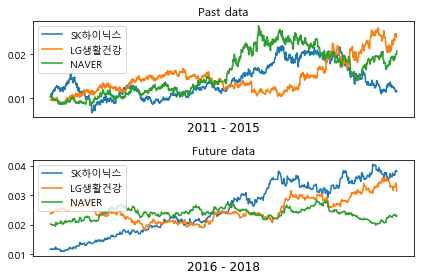

In [146]:
visualize(pdata, fdata, similar)

In [ ]:
type(y1)